### This notebook contains the preliminary preprocessing and exploration done on our dataset before we start our visualization project.

# Data Preprocessing

In [74]:
import pandas as pd
import os
import re
import seaborn as sns



## Data Import

In [75]:
# Define paths
data_dir = './data'
tours = ['atp_mens_tour', 'wta_womens_tour']


In [76]:
# Loop through ATP & WTA folders
for tour in tours:
    tour_path = os.path.join(data_dir, tour)
    
    for file_name in os.listdir(tour_path):
        if file_name.endswith(('.xls', '.xlsx')):
            file_path = os.path.join(tour_path, file_name)
            print(f'Converting {file_path}...')
            
            # Read Excel
            df = pd.read_excel(file_path)
            
            # Define CSV output path
            csv_file = file_name.rsplit('.', 1)[0] + '.csv'
            csv_path = os.path.join(tour_path, csv_file)
            
            # Save as CSV
            df.to_csv(csv_path, index=False)

Converting ./data/atp_mens_tour/2021.xlsx...
Converting ./data/atp_mens_tour/2006.xls...
Converting ./data/atp_mens_tour/2012.xls...
Converting ./data/atp_mens_tour/2007.xls...
Converting ./data/atp_mens_tour/2011.xls...
Converting ./data/atp_mens_tour/2005.xls...
Converting ./data/atp_mens_tour/2004.xls...
Converting ./data/atp_mens_tour/2010.xls...
Converting ./data/atp_mens_tour/2017.xlsx...
Converting ./data/atp_mens_tour/2016.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/atp_mens_tour/2000.xls...
Converting ./data/atp_mens_tour/2001.xls...
Converting ./data/atp_mens_tour/2003.xls...
Converting ./data/atp_mens_tour/2020.xlsx...
Converting ./data/atp_mens_tour/2002.xls...
Converting ./data/atp_mens_tour/2013.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/atp_mens_tour/2019.xlsx...
Converting ./data/atp_mens_tour/2023.xlsx...
Converting ./data/atp_mens_tour/2015.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/atp_mens_tour/2009.xls...
Converting ./data/atp_mens_tour/2008.xls...
Converting ./data/atp_mens_tour/2014.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/atp_mens_tour/2022.xlsx...
Converting ./data/atp_mens_tour/2018.xlsx...
Converting ./data/wta_womens_tour/2021.xlsx...
Converting ./data/wta_womens_tour/2012.xls...
Converting ./data/wta_womens_tour/2007.xls...
Converting ./data/wta_womens_tour/2011.xls...
Converting ./data/wta_womens_tour/2010.xls...
Converting ./data/wta_womens_tour/2017.xlsx...
Converting ./data/wta_womens_tour/2016.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/wta_womens_tour/2020.xlsx...
Converting ./data/wta_womens_tour/2013.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/wta_womens_tour/2019.xlsx...
Converting ./data/wta_womens_tour/2023.xlsx...
Converting ./data/wta_womens_tour/2015.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/wta_womens_tour/2009.xls...
Converting ./data/wta_womens_tour/2008.xls...
Converting ./data/wta_womens_tour/2014.xlsx...


/Users/karine/opt/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Converting ./data/wta_womens_tour/2022.xlsx...
Converting ./data/wta_womens_tour/2018.xlsx...


In [77]:
# Define target directory for CSVs
target_dir = './csv_data'

# Loop through ATP & WTA folders again to move CSVs
for tour in tours:
    source_tour_path = os.path.join(data_dir, tour)
    target_tour_path = os.path.join(target_dir, tour)
    
    # Create target folder if not exists
    os.makedirs(target_tour_path, exist_ok=True)
    
    for file_name in os.listdir(source_tour_path):
        if file_name.endswith('.csv'):
            source_file = os.path.join(source_tour_path, file_name)
            target_file = os.path.join(target_tour_path, file_name)
            
            print(f'Moving {source_file} to {target_file}')
            # Move the CSV file
            os.replace(source_file, target_file)

print('✅ CSV files moved to new folders!')


Moving ./data/atp_mens_tour/2008.csv to ./csv_data/atp_mens_tour/2008.csv
Moving ./data/atp_mens_tour/2020.csv to ./csv_data/atp_mens_tour/2020.csv
Moving ./data/atp_mens_tour/2021.csv to ./csv_data/atp_mens_tour/2021.csv
Moving ./data/atp_mens_tour/2009.csv to ./csv_data/atp_mens_tour/2009.csv
Moving ./data/atp_mens_tour/2023.csv to ./csv_data/atp_mens_tour/2023.csv
Moving ./data/atp_mens_tour/2022.csv to ./csv_data/atp_mens_tour/2022.csv
Moving ./data/atp_mens_tour/2019.csv to ./csv_data/atp_mens_tour/2019.csv
Moving ./data/atp_mens_tour/2018.csv to ./csv_data/atp_mens_tour/2018.csv
Moving ./data/atp_mens_tour/2001.csv to ./csv_data/atp_mens_tour/2001.csv
Moving ./data/atp_mens_tour/2015.csv to ./csv_data/atp_mens_tour/2015.csv
Moving ./data/atp_mens_tour/2014.csv to ./csv_data/atp_mens_tour/2014.csv
Moving ./data/atp_mens_tour/2000.csv to ./csv_data/atp_mens_tour/2000.csv
Moving ./data/atp_mens_tour/2016.csv to ./csv_data/atp_mens_tour/2016.csv
Moving ./data/atp_mens_tour/2002.csv t

In [78]:
# Combine CSVs from the new folders
combined_df_list = []

# New CSV data directory
csv_data_dir = './csv_data'

for tour in tours:
    tour_path = os.path.join(csv_data_dir, tour)
    
    for file_name in os.listdir(tour_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(tour_path, file_name)
            print(f'Loading {file_path}...')
            
            df = pd.read_csv(file_path)
            
            # Add Tour and Year columns
            df['Tour'] = 'ATP' if tour == 'atp_mens_tour' else 'WTA'
            # Extract 4-digit year from filename
            year_match = re.findall(r'\d{4}', file_name)
            df['Year'] = year_match[0] if year_match else None            
            combined_df_list.append(df)

# Concatenate all data
full_df = pd.concat(combined_df_list, ignore_index=True)
print(f'\nTotal records loaded: {full_df.shape[0]}')
full_df.head()


Loading ./csv_data/atp_mens_tour/2008.csv...
Loading ./csv_data/atp_mens_tour/2020.csv...
Loading ./csv_data/atp_mens_tour/2021.csv...
Loading ./csv_data/atp_mens_tour/2009.csv...
Loading ./csv_data/atp_mens_tour/2023.csv...
Loading ./csv_data/atp_mens_tour/2022.csv...
Loading ./csv_data/atp_mens_tour/2019.csv...
Loading ./csv_data/atp_mens_tour/2018.csv...
Loading ./csv_data/atp_mens_tour/2001.csv...
Loading ./csv_data/atp_mens_tour/2015.csv...
Loading ./csv_data/atp_mens_tour/2014.csv...
Loading ./csv_data/atp_mens_tour/2000.csv...
Loading ./csv_data/atp_mens_tour/2016.csv...
Loading ./csv_data/atp_mens_tour/2002.csv...
Loading ./csv_data/atp_mens_tour/2003.csv...
Loading ./csv_data/atp_mens_tour/2017.csv...
Loading ./csv_data/atp_mens_tour/2013.csv...
Loading ./csv_data/atp_mens_tour/2007.csv...
Loading ./csv_data/atp_mens_tour/2006.csv...
Loading ./csv_data/atp_mens_tour/2012.csv...
Loading ./csv_data/atp_mens_tour/2004.csv...
Loading ./csv_data/atp_mens_tour/2010.csv...
Loading ./

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,GBW,GBL,IWW,IWL,SBW,SBL,B&WW,B&WL,WTA,Tier
0,1.0,Adelaide,Next Generation Adelaide International,2007-12-31,International,Outdoor,Hard,1st Round,3.0,Querrey S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Adelaide,Next Generation Adelaide International,2007-12-31,International,Outdoor,Hard,1st Round,3.0,Sirianni J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Adelaide,Next Generation Adelaide International,2007-12-31,International,Outdoor,Hard,1st Round,3.0,Russell M.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Adelaide,Next Generation Adelaide International,2007-12-31,International,Outdoor,Hard,1st Round,3.0,Becker B.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Adelaide,Next Generation Adelaide International,2007-12-31,International,Outdoor,Hard,1st Round,3.0,Zverev M.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Check percentage of missing values
missing_percent = full_df.isnull().mean() * 100
print('\nMissing Values (%):')
print(missing_percent[missing_percent > 0])



Missing Values (%):
ATP        38.563982
Date        0.001941
Series     38.563982
Best of     0.014560
WRank       0.070859
LRank       0.214519
WPts       15.786102
LPts       15.926850
W1          0.592112
L1          0.589200
W2          1.534639
L2          1.534639
W3         58.949146
L3         58.950117
W4         94.250687
L4         94.250687
W5         97.824715
L5         97.824715
Wsets       0.551344
Lsets       0.552315
B365W       8.749672
B365L       8.725405
EXW        33.756224
EXL        33.752342
LBW        47.252502
LBL        47.241824
PSW        17.276089
PSL        17.275119
UBW        82.923870
UBL        82.923870
MaxW       36.692519
MaxL       36.693490
AvgW       36.692519
AvgL       36.692519
SJW        71.160249
SJL        71.153454
CBW        80.650547
CBL        80.650547
GBW        95.093233
GBL        95.093233
IWW        87.033712
IWL        87.033712
SBW        94.735054
SBL        94.735054
B&WW       98.935169
B&WL       98.935169
WTA        61

In [80]:
# Drop columns with more than 50% missing values
nan_threshold = 0.5
cols_to_drop = full_df.columns[full_df.isnull().mean() > nan_threshold]
if len(cols_to_drop) > 0:
    print(f'\nDropping columns: {cols_to_drop.tolist()}')
    full_df.drop(columns=cols_to_drop, inplace=True)
else:
    print('\nNo columns exceeded missing value threshold.')


# Forward fill only numeric columns
numeric_cols = full_df.select_dtypes(include='number').columns
full_df[numeric_cols] = full_df[numeric_cols].fillna(method='ffill')

print('\nMissing values in numeric columns handled.')



Dropping columns: ['W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'UBW', 'UBL', 'SJW', 'SJL', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL', 'B&WW', 'B&WL', 'WTA', 'Tier']

Missing values in numeric columns handled.


In [81]:
# Clean column names
full_df.columns = [col.strip().lower().replace(' ', '_') for col in full_df.columns]

# Remove duplicates
duplicates = full_df.duplicated().sum()
print(f'\nNumber of duplicates found: {duplicates}')
if duplicates > 0:
    full_df.drop_duplicates(inplace=True)
    print('Duplicates removed.')




Number of duplicates found: 0


In [82]:
# Quick look at dataset
print('\nDataset Overview:')
print(full_df.describe())
print('\nTour Distribution:')
print(full_df['tour'].value_counts())
print('\nYear Distribution:')
print(full_df['year'].value_counts())


Dataset Overview:
                 atp        best_of           wpts           lpts  \
count  103021.000000  103021.000000  103021.000000  103021.000000   
mean       45.830675       3.233350    3047.274029    2381.541814   
std        21.947634       0.642069    3482.996821    3155.288897   
min         1.000000       3.000000       1.000000       1.000000   
25%        27.000000       3.000000     757.000000     578.000000   
50%        51.000000       3.000000    1366.000000     945.000000   
75%        67.000000       3.000000    4030.000000    2175.000000   
max        69.000000       5.000000   16950.000000   16950.000000   

                  w1             l1          wsets          lsets  \
count  103021.000000  103021.000000  103021.000000  103021.000000   
mean        5.763951       3.893080       2.075839       0.379311   
std         1.253455       1.891754       0.397191       0.528738   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.

In [83]:
# Save cleaned dataset
output_path = 'preprocessed_tennis_data.csv'
full_df.to_csv(output_path, index=False)
print(f'\n✅ Preprocessed data saved as {output_path}')



✅ Preprocessed data saved as preprocessed_tennis_data.csv


# Data Exploration

## Tour Distribution

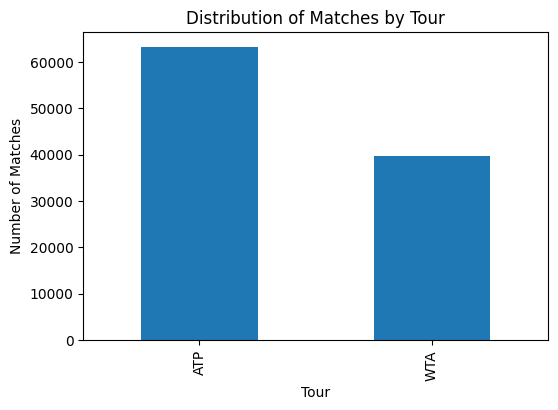

In [84]:
import matplotlib.pyplot as plt

# Bar plot for Tour distribution
full_df['tour'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Matches by Tour')
plt.xlabel('Tour')
plt.ylabel('Number of Matches')
plt.show()


## Year Distribution

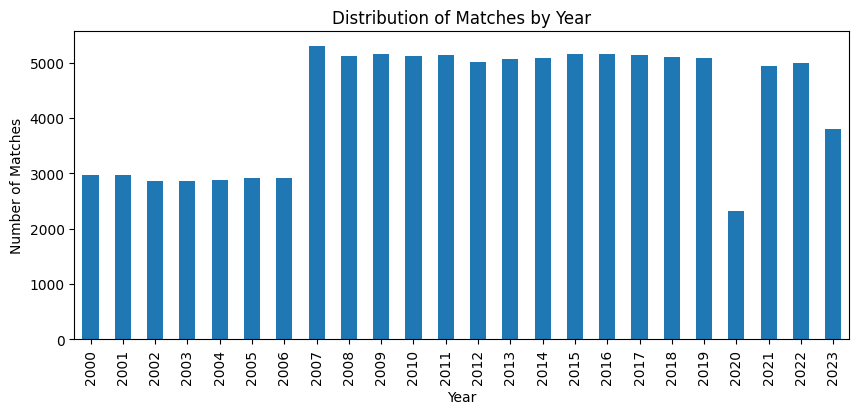

In [85]:
# Bar plot for Year distribution
full_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Distribution of Matches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


## Match surface distribution

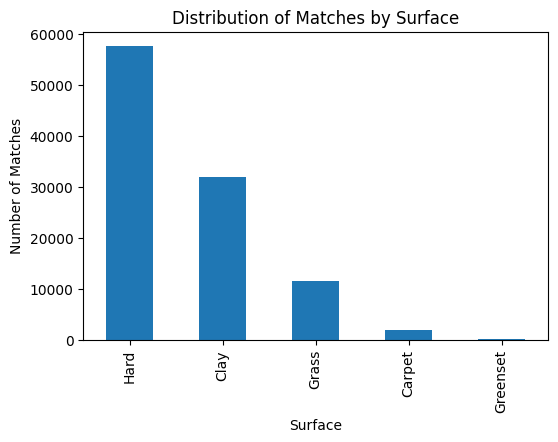

In [86]:
if 'surface' in full_df.columns:
    full_df['surface'].value_counts().plot(kind='bar', figsize=(6,4))
    plt.title('Distribution of Matches by Surface')
    plt.xlabel('Surface')
    plt.ylabel('Number of Matches')
    plt.show()


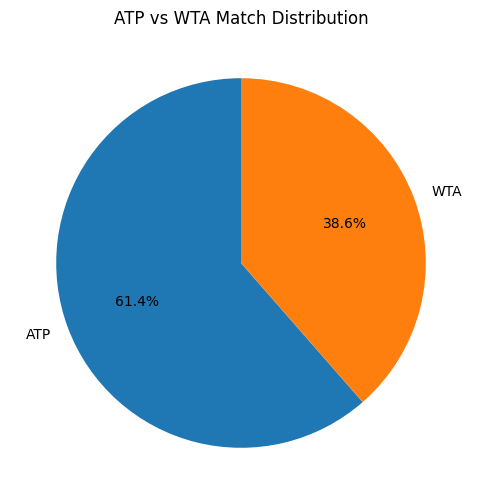

In [88]:
full_df['tour'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('ATP vs WTA Match Distribution')
plt.ylabel('')
plt.show()
